# Síntesis de cuadripolos descargados
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
En este notebook se presenta una metodología sistemática para la sínteisis de cuadripolos descargados y  no disipativos. Se presentan los detalles de la metodología y algunas referencias teóricas. Se presenta también un ejemplo donde se utilizan algunas de las siguientes funciones de PyTC2 

* Funciones de dibujo de redes: [dibujar_puerto_entrada](), [dibujar_funcion_exc_abajo](), [dibujar_elemento_derivacion](), [dibujar_espacio_derivacion](), [dibujar_elemento_serie](), [dibujar_Pi](), [dibujar_Tee](), [dibujar_lattice]()
* Funciones de síntesis de dipolos: [remover_polo_infinito](), [remover_polo_dc](), [remover_polo_jw](), [isFRP]
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


### Introducción

En esta sección se comienza con un tema central de la asignatura *Teoría de Circuitos 2* que es la síntesis de redes pasivas que cumplan alguna restricción dada por la función transferencia (FT). Para ello utilizaremos los conceptos de síntesis de funciones de excitación (FE) vistos en la sección anterior. De hecho la metodología se fundamenta en convertir la restricción impuesta por la FT en una FE que pueda sintetizarse siguiendo cualquiera de los métodos previamente vistos.

Este documento se centra en la descripción y uso de la metodología mediante las herramientas computacionales desarrolladas en PyTC2. El lector interesado, puede consultar más detalles en las referencias citadas.

Para cualquier cuadripolo descargado se sabe que los 4 parámetros transferencia (ABCD) pueden escribirse en función de los demás juegos de parámetros que se definieron con anterioridad. Nos interesará especialmente lograr definir estos parámetros como el cociente de una FT y otra FE. Si se revisa [cualquier tabla de conversión](ejnb_conversion_cuadripolos.ipynb) de parámetros se puede observar:

$$ A = \frac{Z_{11}}{Z_{21}} = -\frac{Y_{22}}{Y_{21}} $$ 
$$ B = -\frac{1}{Y_{21}}  $$ 
$$ C = \frac{1}{Z_{21}}  $$ 
$$ D = \frac{Z_{22}}{Z_{21}} = -\frac{Y_{11}}{Y_{21}} $$ 

Esto significa que para realizar una síntesis de una FT de tensiones A, podremos lograrla tanto a través de $Z_{11}$ o $Y_{22}$. Recordando ambas definiciones, esto resulta en una síntesis *desde* el puerto de entrada o salida respectivamente. Independientemente de la elección, se sabe que $ A = \frac{P(s)}{Q(s)} $ es una función racional y tanto $Z_{11}$ como $Z_{21}$, por lo general, no podrán ser solo polinomios P y Q. Por lo tanto conviene adoptar un polinomio auxiliar $R(s)$, de forma que

$$ A = \frac{\frac{P}{R}}{\frac{Q}{R}}.$$

Al asegurar que $Z_{11} = \frac{P}{R}$ sea **función real positiva** (FRP), y en consecuencia $Z_{21} = \frac{Q}{R}$ sea **estable**. El mismo planteo es válido si se optara por hacer $Y_{22}$ FRP. Como puede notarse, al sintetizar $Z_{11}$ solo cumpliríamos con el polinomio $P(s)$, a menos que utilicemos el polinomio $Q(s)$ como guía para realizar **las remociones donde $Q(s)$ tenga raíces**. Por último decir que si se asegura que la FE sea FRP ($Z_{11}$ o $Y_{22}$) al mismo tiempo se garantiza que la FT sea estable. 

Conviene recordar que por lo general las FT de un cuadripolo se definen como el recíproco de los parámetros ABCD. Tenemos por ejemplo, para el caso de A

$$ \frac{V_2}{V_1} = \frac{1}{A} = T(s) $$

Por lo tanto, es equivalente decir que al sintetizar $Z_{11}$ se cumple **solo** con los polos de $T$, mientras que al remover los polos de $Z_{11}$ en las frecuencias de los ceros de $Z_{21}$ (o $T$), **se cumplirá con la restricción impuesta por T(s) en su conjunto** (salvo un factor de proporcionalidad $k$, que se verá luego). Notar en las expresiones de ABCD, que los ceros de transimisión de los parámetros de cualquier modelo de cuadripolo, **son siempre los mismos**. Es decir que los ceros de $Z_{21}$, coinciden con los de $Y_{21}$ y con los recíprocos de todos los ABCD. Un último comentario respecto de la inmitancia terminal *no utilizada* durante el proceso de síntesis ($Z_{22}$ ó $Y_{11}$): esta quedará libre y no tendrá ninguna incidencia en la red que se termine sintetizando.

Cuando se prescriben los parámetros $Z_{21}$ ó $Y_{21}$, lo primero que habría que poder determinar es si el cuadripolo podría o no ser simétrico. En caso afirmativo, una red balanceada *lattice* **siempre podría ser implementada** y es un camino de síntesis segura. En cualquier otro caso, ya sea que no puede ser simétrica o preferimos una red desbalanceada (e.g. una red escalera), debemos hacer alguna asunción sobre alguna de sus inmitancias de entrada ó salida, es decir $Z_{xx}$ ó $Y_{xx}$. Una opción segura es utilizar la condición de residuos que reza

$$ k_{j,11} \cdot k_{j,22} - k_{j,12}^2 \geq 0  $$

para **todos** los j-*ésimos* polos presentes en $Z_{21}$ (ó $Y_{21}$). Asegurando que solo un residuo entrada ó salida cumple esta condición, suele ser una opción segura para proceder de forma análoga al sintetizar restricciones en los parámetros $A$ ó $D$. Esto es por ejemplo, sintetizar $Z_{11}$ siguiendo los ceros de transmisión de $Z_{21}$, dejando libre el parámetro $Z_{22}$, o viceversa.


### Referencias

1. [Kuo, F. *Network Analysis and Synthesis*.](https://drive.google.com/file/d/1WZEsKhywwb5SJqR7fEId6gJI8eIU8dB-/view?usp=drive_link)
2. [Araujo, A. (1987) Análisis y Síntesis de Funciones de Red (Tomos I y II). Editorial GYVE. ISBN 978-987-43-4583-7](https://drive.google.com/file/d/1L8hF9xnL_K8qYOdEoTPERISPnjVTAnUI/view?usp=drive_link)
3. [Warzanskyj Poliscuk, Wsewolod. *Métodos de síntesis de redes lineales*. Dpto. de Publicaciones. Universidad Politécnica de Madrid. 1977.](https://drive.google.com/drive/folders/1Bd87h5CEfY2NmMum0U-n74j2_2Tj3y1n?usp=drive_link)


## Ejemplo: No disipativa con ceros sobre el $j\omega$

Sintetizar un cuadripolo con los siguientes parámetros *cortocircuito*

$$ Y_{22} = \frac{(2s^2+1)}{(s^3+2s)} $$ 

y

$$ Y_{21} = \frac{(s^2+9)}{(s^3+2s)} $$ 

Se sintetizará el cuadripolo desde la salida, realizando remociones sobre $Y_{22}$, comenzando por los ceros de transmisión impuestos por $Y_{21}$. Los polos y ceros de ambas funciones se muestran a continuación

![met_graf_0](./img/sint_descargada_metodo_grafico0.png)

Es decir que forzosamente hay que remover en $\omega = 3$ y $\omega \to \infty$. Se comenzará realizando una remoción en $\infty$, que aprovecharemos para situar el cero más cercano en $\omega = 3$ en el mismo paso

![met_graf_1](./img/sint_descargada_metodo_grafico1.png)

Con esta remoción parcial, podemos proceder a una remoción total en $\omega = 3$

![met_graf_2](./img/sint_descargada_metodo_grafico2.png)

En este momento solo resta retirar un elemento, es decir que llegamos al otro extremo de la red o el puerto de entrada. Habría que analizar qué generador estará conectado al puerto 1 de acuerdo a la transferencia prescrita $ Y_{21} = \frac{I_2}{V_1}$. Como se trata de un generador de tensión, aseguramos que el último elemento removido (o el primer elemento del cuadripolo de izquierda a derecha), esté en serie con dicho generador. La topología resultante debería ser una *red Tee*.

Con el método gráfico como guía para los cálculos, procedemos al cálculo analítico de los componentes usando las funciones de remoción simbólica. Se comienza por la inicialización de variables y funciones.

In [1]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_infinito, remover_polo_jw, isFRP

from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

# Importante importar símbolos de variables 
from pytc2.general import s


In [2]:
# Sea la siguiente función de excitación
Y22 = (2*s**2+1)/(s**3+2*s)
Y21 = (s**2+9)/(s**3+2*s)

print_subtitle('Admitancias del Ejemplo')

print_latex(a_equal_b_latex_s('Y_{22}', Y22))
print_latex(a_equal_b_latex_s('Y_{21}', Y21))


#### Admitancias del Ejemplo

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
print_subtitle('1º Remoción parcial en $\infty$')

omega_L2C2 = 3

Z2, Zl1 = remover_polo_infinito(1/Y22, omega_zero = omega_L2C2 )

# Zl1 es la admitancia removida
# extraigo L1
L1 = Zl1/s

print_latex(a_equal_b_latex_s('Z_{L1} = k_\infty \cdot s', Zl1))
print_latex(a_equal_b_latex_s('L_1', L1))
print_latex(a_equal_b_latex_s('Z_2', Z2))


#### 1º Remoción parcial en $\infty$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
print_subtitle('2º Remoción total en $\omega = 3$')

Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

# Zl1 es la admitancia removida
# extraigo L1
L1 = Zl1/s

print_latex(a_equal_b_latex_s('Y_{{t2}} = \\frac{{2 k \\cdot s}}{{s^2+ {:d}^2}}'.format(omega_L2C2), Yt2))
print_latex(a_equal_b_latex_s('L_2', L2))
print_latex(a_equal_b_latex_s('C_2', C2))
print_latex(a_equal_b_latex_s('Y_4', Y4))


#### 2º Remoción total en $\omega = 3$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
print_subtitle('3º Remoción total en $\infty$')

# extraigo finalmente L3
L3 = 1/Y4/s

print_latex(a_equal_b_latex_s('L_3', L3))


#### 3º Remoción total en $\infty$

<IPython.core.display.Math object>

Ahora se dibujará la red sintetizada para proceder a la verificación.

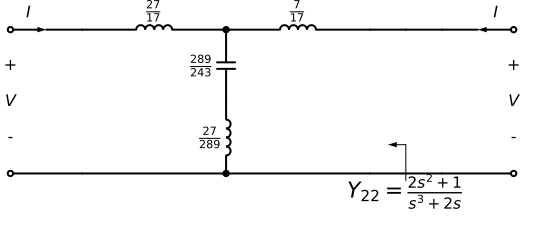

In [6]:
from pytc2.dibujar import dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_tanque_derivacion, dibujar_funcion_exc_abajo
from schemdraw import Drawing

# Red ejemplo 1
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d = dibujar_elemento_serie(d, 'L', L3)

d = dibujar_tanque_derivacion(d, inductor_label=L2, capacitor_label=C2)

#d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_serie(d, 'L', L1)

d = dibujar_funcion_exc_abajo(d, 
                 'Y_{22}',  
                 Y22, 
                 hacia_entrada = True,
                 k_gap_width = 0.5)

d = dibujar_puerto_salida(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

display(d)

### Verificación

Una verificación evidente es a partir de la matriz Z de la red **Tee** resultante. Una vez obtenida la matriz Z, obtenemos la Y con lo que se concluye la verificación.

Recordar que este método de síntesis no impuso restricciones sobre $Y_{11}$ ni sobre la escala de $Y_{21}$, es decir que la red que se sintetizó tendrá un $Y_{21}^{"}$ que respeta proporcionalidad con el prescrito $k_{21} \cdot Y_{21}^{"} = Y_{21}$

In [7]:
from pytc2.dibujar import dibujar_Pi, dibujar_Tee, dibujar_lattice

Zc = Zl1
Zb = 1/Yt2
Za = 1/Y4

Ztee = sp.Matrix([[Za+Zb, Zb], [Zb, Zc+Zb]])
Ypi = Ztee**-1
print_latex(a_equal_b_latex_s('Z_T^{-1} = Y_{\\pi}', Ypi))
print_latex(a_equal_b_latex_s('k_{{21}} \\cdot Y^{{"}}_{{\\pi \\, 21}}', Y21))
k_21 = sp.expand(sp.simplify(Y21 / Ypi[0,1]))
print_latex(a_equal_b_latex_s('k^{{"}}_{{21}}', k_21))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Se finaliza la verificación con una simulación circuital en LTspice. 

![LTspice](./img/sint_descargada_ltspice.png)

Prestar atención a que se utiliza una norma de frecuencia para facilitar la verificación numérica $Y_{22}$ con  polos en $\omega = (0, \sqrt{2})$ y cero en $\omega = \sqrt{2}/2$. Mientras que $Y_{21}$ verifica la localización de sus ceros en $\omega = (3, \infty)$. Notar finalmente como $Y_{22}$ no tiene polos privados.

### Para reflexionar

Dado que tenemos el modelo $\pi$ a mano de la matriz $Y$ con el que verificamos el problema, caben algunas preguntas:

1. ¿La red $\pi$ resultante podría satisfacer la transferencia prescrita en el Ejemplo?
2. ¿Y el la red balanceada *lattice*?
3. ¿Existe alguna otra red que pueda cumplir con los parámetros $Y_{22}$ e $Y_{21}$?



#### Matriz Z a partir de la síntesis

<IPython.core.display.Math object>

#### Matriz Y

<IPython.core.display.Math object>

#### Red Pi equivalente

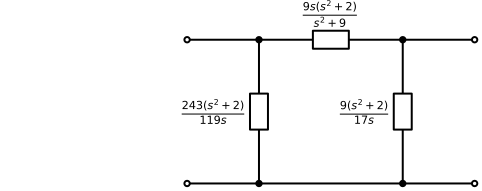

In [8]:
print_subtitle('Matriz Z a partir de la síntesis')
print_latex(a_equal_b_latex_s('Z_T', Ztee))
print_subtitle('Matriz Y')
print_latex(a_equal_b_latex_s('Z_T^{-1} = Y_{\\pi}', Ypi))
print_subtitle('Red Pi equivalente')
dibujar_Pi(Ypi)

#### Red Lattice equivalente

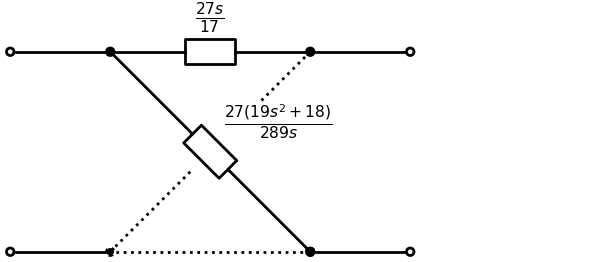

In [9]:
print_subtitle('Red Lattice equivalente')
dibujar_lattice(Ztee)


El lector interesado puede usar las herramientas de PyTC2 para hallar y verificar otras alternativas de síntesis, si las hubiera ...

![nada](./img/nada.png)
<img src="./img/homero1.png" alt="Homero Simpson" align="right" width=100px>
